In [1]:
from utils.data import *
from utils.MobileNet import *
from time import time
import matplotlib.pyplot as plt
from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adam
from keras.utils import to_categorical
from keras.regularizers import l1,l2

Using TensorFlow backend.


## Load data

In [2]:
#number of classes to consider
n_classes = 60

#resolution multiplier in (0,1)
#image shape is (pho*224,pho*224,3)
pho = 1

t1 = time()
data, labels, label_to_breed, breed_to_label = load_data(width = int(pho*224), 
                                                         height = int(pho*224), 
                                                         n_classes = n_classes)
print('Time to load the data: %ss' % int(time()-t1))

./data/dog_images.tar already exists. Begin extracting...
Standford dogs data were extracted. Begin creating dataset...
Dataset, labels and dictionaries are loaded
Time to load the data: 60s


In [3]:
print('Shape data: {}'.format(data.shape))
print('Shape labels: {}'.format(labels.shape))

Shape data: (10254, 224, 224, 3)
Shape labels: (10254,)


In [4]:
#shuffle dataset because images are grouped by similar class
shuffle = np.random.choice(data.shape[0], data.shape[0], replace = False)

x = data[shuffle,:,:,:]
y = labels[shuffle,]
x.shape, y.shape

((10254, 224, 224, 3), (10254,))

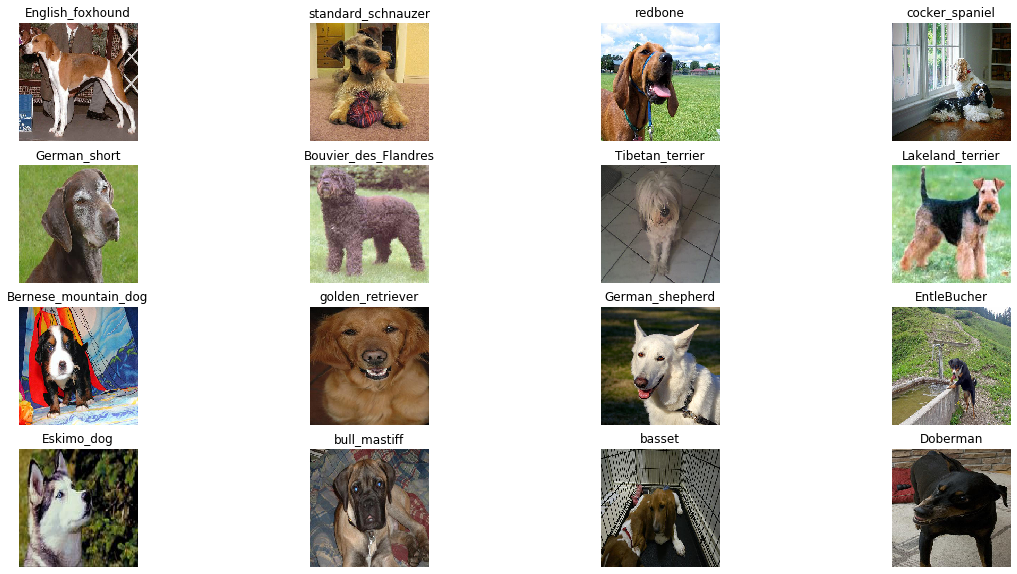

In [5]:
# Visualization of the original data
fig = plt.figure(figsize=(20,10))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(x[i,:,:,:])
    ax.axis('off')
    ax.title.set_text(label_to_breed[y[i]])

In [6]:
#split dataset in 3: training_set, validation_set and test_set
num_train = int(0.90*x.shape[0])
num_val = int(0.05*x.shape[0])
num_test = x.shape[0]-(num_train+num_val)

x_train = x[:num_train,:,:,:]
y_train = y[:num_train,]
x_val = x[num_train:num_train+num_val,:,:,:]
y_val = y[num_train:num_train+num_val,]
x_test = x[num_train+num_val:,:,:,:]
y_test = y[num_train+num_val:,]

x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(9228, 224, 224, 3) (9228,)
(512, 224, 224, 3) (512,)
(514, 224, 224, 3) (514,)


In [7]:
model = MobileNet(input_shape = x.shape[1:], 
              n_classes = n_classes, 
              alpha = 1, 
              reg_c= None,
              reg_dc = None,
              add_batch_norm = True, 
              add_dropout = False, 
              dropout_rate = 0.5, 
              optimizer = RMSprop(lr=0.001, rho=0.9))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)     

In [ ]:
# 9. Fit model on training data
history = model.fit(x_train, to_categorical(y_train), validation_data=(x_val, to_categorical(y_val)), 
          batch_size=128, epochs=50, verbose=1)

Train on 9228 samples, validate on 512 samples
Epoch 1/1
4736/9228 [==============>...............] - ETA: 2:15 - loss: 4.7960 - accuracy: 0.0188

In [10]:
# 10. Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/1
19550/19550 [==============================] - 2027s 104ms/step - loss: 4.7486 - accuracy: 0.0182


In [11]:
score

[4.560169435451051, 0.03498542308807373]